In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a pandas DataFrame from the Excel file

In [2]:
data = pd.read_excel('data.xlsx')

### Exploring Data

In [3]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [4]:
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


### Data Preprocessing

1. We are looking into each column of the DataFrame and decide if the feature affects the analysis

Audience Type
    1. This feature is categorical with 3 kinds of categories along with missing values
    2. By getting the counts of the each categorical value in the feature we can realise that more than 80% of 
       data is missing.
    3. Due to this we can conclude that this feature plays no role in our analysis

In [5]:
"""
Starting with feature -> 'audience_type' 

"""
data['audience_type'].unique()

array(["'-", 'Audience 2', 'Audience 3', 'Audience 1'], dtype=object)

In [6]:
data['audience_type'].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

After a further exploring we can also conclude that it is the same case with 2 other feature

1. 'creative_type'
2. 'creative_name'

In [7]:
data['creative_type'].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [8]:
data['creative_name'].value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

Now that we have reached to a conclusion that all these features are not important we can drop them from the data

**Continuing data exploring**

On futher exploration we can see that the feature 'product' is unary categorical product which is redundant so we can drop this too

In [9]:
data['product'].value_counts()

Product 1    16834
Name: product, dtype: int64

'Phase' is another feature which is similar to 'product' on which we will take the same action

In [10]:
data['phase'].value_counts()

Performance    16834
Name: phase, dtype: int64

Exploring below features

1.campaign_platform

2.campaign_type 

3.campaign_medium

In [11]:
data['campaign_type'].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

In [12]:
data['campaign_platform'].value_counts()

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

Checking if these two rows are categorically equivalent

In [13]:
data.loc[data['campaign_platform']=='Facebook Ads']['campaign_type'].value_counts()

Conversions    1733
Name: campaign_type, dtype: int64

In [14]:
data.loc[data['campaign_platform']=='Google Ads']['campaign_type'].value_counts()

Search    15101
Name: campaign_type, dtype: int64

The above cell say that all data on Google Ads platform has campaign_type search and Facebook Ads has Conversions.

Since we don't need new column to know this, we can declare this column as redundant

*Performing same operations on 'communication_medium'*

In [15]:
data.loc[data['campaign_platform']=='Facebook Ads']['communication_medium'].value_counts()

Creative    1733
Name: communication_medium, dtype: int64

In [16]:
data.loc[data['campaign_platform']=='Google Ads']['communication_medium'].value_counts()

Search Keywords    15101
Name: communication_medium, dtype: int64

From this we can conclude that campaign_platform, campaign_type and communication_medium are effectively equivalent so we need only 1 of them.

    comapring spends, impressions, clicks, link_clicks of Facebook Ads and Google Ads

In [17]:
data.where(data['campaign_platform']=='Google Ads').sum()/data['campaign_platform'].value_counts()[0]

spends         128.402308
impressions     51.446460
clicks           8.215681
link_clicks      0.000000
dtype: float64

In [18]:
data.where(data['communication_medium']=='Creative').sum()/data['communication_medium'].value_counts()[1]

spends          325.513855
impressions    2348.881708
clicks           44.759954
link_clicks      20.398731
dtype: float64

1. With the above analysis we can find that there are inconsistencies in the data. Google Ads have no entries in link_clicks.

2. Although it looks like Facebook Ads are performing far better than Google Ads we can conclude it beacuse there is a 
   very big class imbalance in the data. Google has almost 11 times more data than Facebook.

3. Due to Imbalance the results of the class can be helped or hurted later being the case here for Google Ads

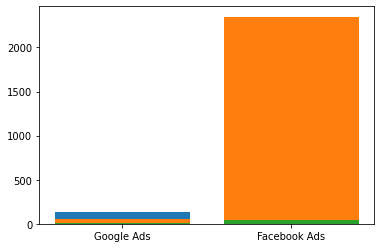

In [19]:
x = ['Google Ads', 'Facebook Ads']
y_spends = [128.402308, 325.513855]
y_impressions = [51.446460, 2348.881708]
y_clicks = [8.215681, 44.759954]

plt.bar(x, y_spends)
plt.savefig('spends_bar')

plt.bar(x, y_impressions)
plt.savefig('impressions_bar')

plt.bar(x, y_clicks)
plt.savefig('clicks_bar')

1. communication_platform vs spends
<img src='spends_bar.png'>

2. communication_platform vs impressions
<img src='impressions_bar.png'>

3. communication_platform vs clicks
<img src='clicks_bar.png'>

Exploring Age feature

In [20]:
data['age'].value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

We can see that the age feature has 2586 missing values labelled as Undetmined.

To include age in the analysis we replace Undetermined with the mode of the age feature set

In [21]:
age_grps = data['age'].value_counts().index

In [22]:
spends_age = []
for grp in age_grps:
    spends_age.append(data.loc[data['age']==grp, 'spends'].sum()/data.loc[data['age']==grp, 'spends'].count())

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

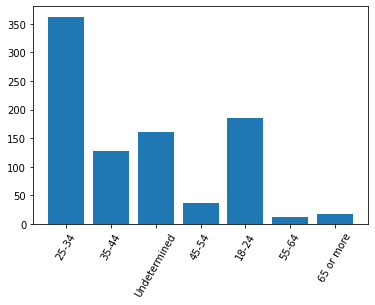

In [23]:
plt.bar(age_grps, spends_age)
plt.xticks(rotation=60)

We can see that most of the views are in the age category 25-34

Exploring subchannel feature set

In [24]:
data['subchannel'].value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64

subchannel is a categorical feature with 4 categories

Exploring spends of each category

In [25]:
data.where(data['subchannel']=='Brand')['spends'].sum()/data['subchannel'].value_counts()[0]

85.00660129886667

In [26]:
data.where(data['subchannel']=='Generic')['spends'].sum()/data['subchannel'].value_counts()[0]

128.76397937094103

In [27]:
data.where(data['subchannel']=='Competitor')['spends'].sum()/data['subchannel'].value_counts()[0]

33.14184260792054

In [28]:
data.where(data['subchannel']=='Facebook Ads')['spends'].sum()/data['subchannel'].value_counts()[0]

71.8343957723163

From the above data we can conclude that

1. Data with subchannel as **Genric** is out-performing all other features
2. Data with subchannel as **Competitors** is Worst performing of all

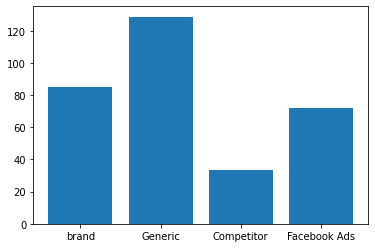

<Figure size 1440x360 with 0 Axes>

In [29]:
x = ['brand', 'Generic', 'Competitor', 'Facebook Ads']
y = [85.00660129886667, 128.76397937094103, 33.14184260792054, 71.8343957723163]

plt.bar(x, y)
plt.figure(figsize=(20,5))
plt.show()

Exploring Devices Feature set

In [30]:
data['device'].value_counts()

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64

Devices is categorical feature with 4 categories

In [31]:
dev_grps = data['device'].value_counts().index

In [32]:
spends_device = []
for grp in dev_grps:
    spends_device.append(data.loc[data['device']==grp, 'spends'].sum()/data.loc[data['device']==grp, 'spends'].count())

<BarContainer object of 4 artists>

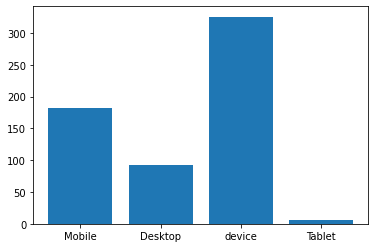

In [33]:
plt.bar(dev_grps, spends_device)

We can see that there is a category device which has most number of spends, Assuming its undetermined we can conclude that Mobile Devices have the most impact with Ads

Spends impressions and clicks are the outcomes of the Ads campaign which we are looking for since out of all three of them spends is most consistent metric that is fairly recoded between Google Ads and Facebook Ads, we train our model to output the spends

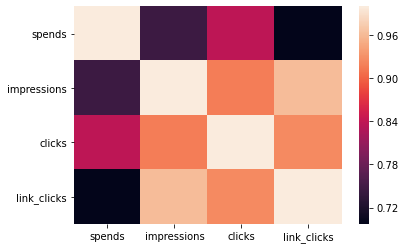

In [34]:
cor_data = data.corr()
sns.heatmap(cor_data)

This Heat map shows that all 4 features are very highly correalted to each other, Hence we can conclude that they will affect the analysis and predictions of the spends feature

Exploring Date and Frequencies

<BarContainer object of 257 artists>

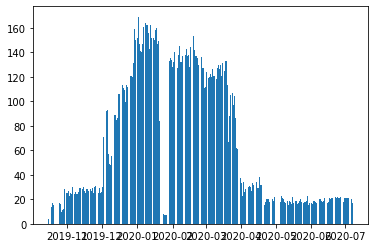

In [36]:
date_freq = data['Date'].value_counts().sort_values(ascending=False)
plt.bar(date_freq.index, date_freq)

With the above plot we can see that the ads peaked during the start of the year following a steep drop

January being the month with most Ads

Conducting pandas profiling to ensure our conclusions

In [37]:
import pandas_profiling
data.profile_report(title='Ads campaign by Google and Facebook')

#### Making Pipeline for data preprocessing

In [38]:
def data_cleanup(data):
    data.drop(['audience_type', 'creative_type', 'creative_name', 
               'product', 'phase', 'campaign_type','communication_medium', 'Date'], axis=1, inplace=True)
    
#     Modify age feature by filling up Nan(Undetermined) with mode
    data['age'].replace(to_replace='Undetermined', value=data['age'].mode()[0], inplace=True)
    
    return data

In [39]:
import xgboost
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [40]:
obj_cols = ['campaign_platform', 'subchannel', 'device', 'age']

In [42]:
def encoding(data, obj_cols):
    data = data_cleanup(data)
    cleaned_data = data.copy()
    y = data['spends']
    x = data.drop(['spends'], axis=1)
    for col in obj_cols:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
    return x, y

#### Pair plotting selected features and looking for patterns

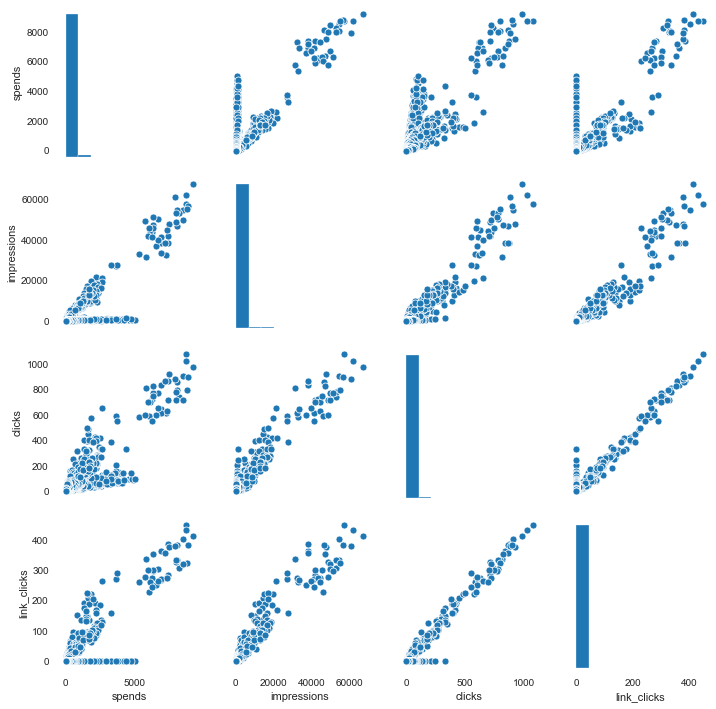

In [49]:
sns.pairplot(data)

This proves that the 4 features are highly correlated(linear)

Splitting Data into train data and test data

In [43]:
x, y = encoding(data, obj_cols)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#### Creating a GridSearch Pipeline

In [45]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2_score',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

After we perform GridSearch (training took about 3.5 hours) we get best tuned hyper parameters.

In [ ]:
model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5)

print(-model.best_score_)
print(model.best_params_)

In [46]:
best_model = xgboost.XGBRegressor(colsample_bytree = 0.8, 
                                  max_depth = 15, 
                                  n_estimators = 4000, 
                                  reg_alpha = 1.2, 
                                  reg_lambda = 1.3, 
                                  subsample = 0.7
                                 )
best_model.fit(x_train, y_train)

[01:16:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1.2, reg_lambda=1.3, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [47]:
y_pred_best = best_model.predict(x_test)
r2_score(y_test, y_pred_best)

0.8351578569841243

The Xgboost Regressor achived the r2_score of 0.835 with 1.0 being the highest achiveable